In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [27]:
column_names = [
    "ID", "Diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
    "compactness_mean","concavity_mean","concave_points_mean","symmetry_mean","fractal_dimension_mean",
    "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
    "concave_points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst",
    "perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst",
    "concave_points_worst","symmetry_worst","fractal_dimension_worst"
]
df=pd.read_csv("wdbc.data",names=column_names)
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
print(df.shape)

(569, 32)


In [29]:
df.isnull().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [30]:
print(df['Diagnosis'].unique())
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
print(df['Diagnosis'].value_counts())

['M' 'B']
Diagnosis
0    357
1    212
Name: count, dtype: int64


In [31]:
feature_columns = [
    "radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
    "compactness_mean","concavity_mean","concave_points_mean","symmetry_mean","fractal_dimension_mean",
    "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
    "concave_points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst",
    "perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst",
    "concave_points_worst","symmetry_worst","fractal_dimension_worst"
]
num_cols = df[feature_columns]
skew_values = num_cols.skew()
print(skew_values)

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave_points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave_points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave_points_worst       0

In [32]:
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(num_cols)
num_cols_transformed = pd.DataFrame(X_transformed, columns=feature_columns)
df[feature_columns] = num_cols_transformed

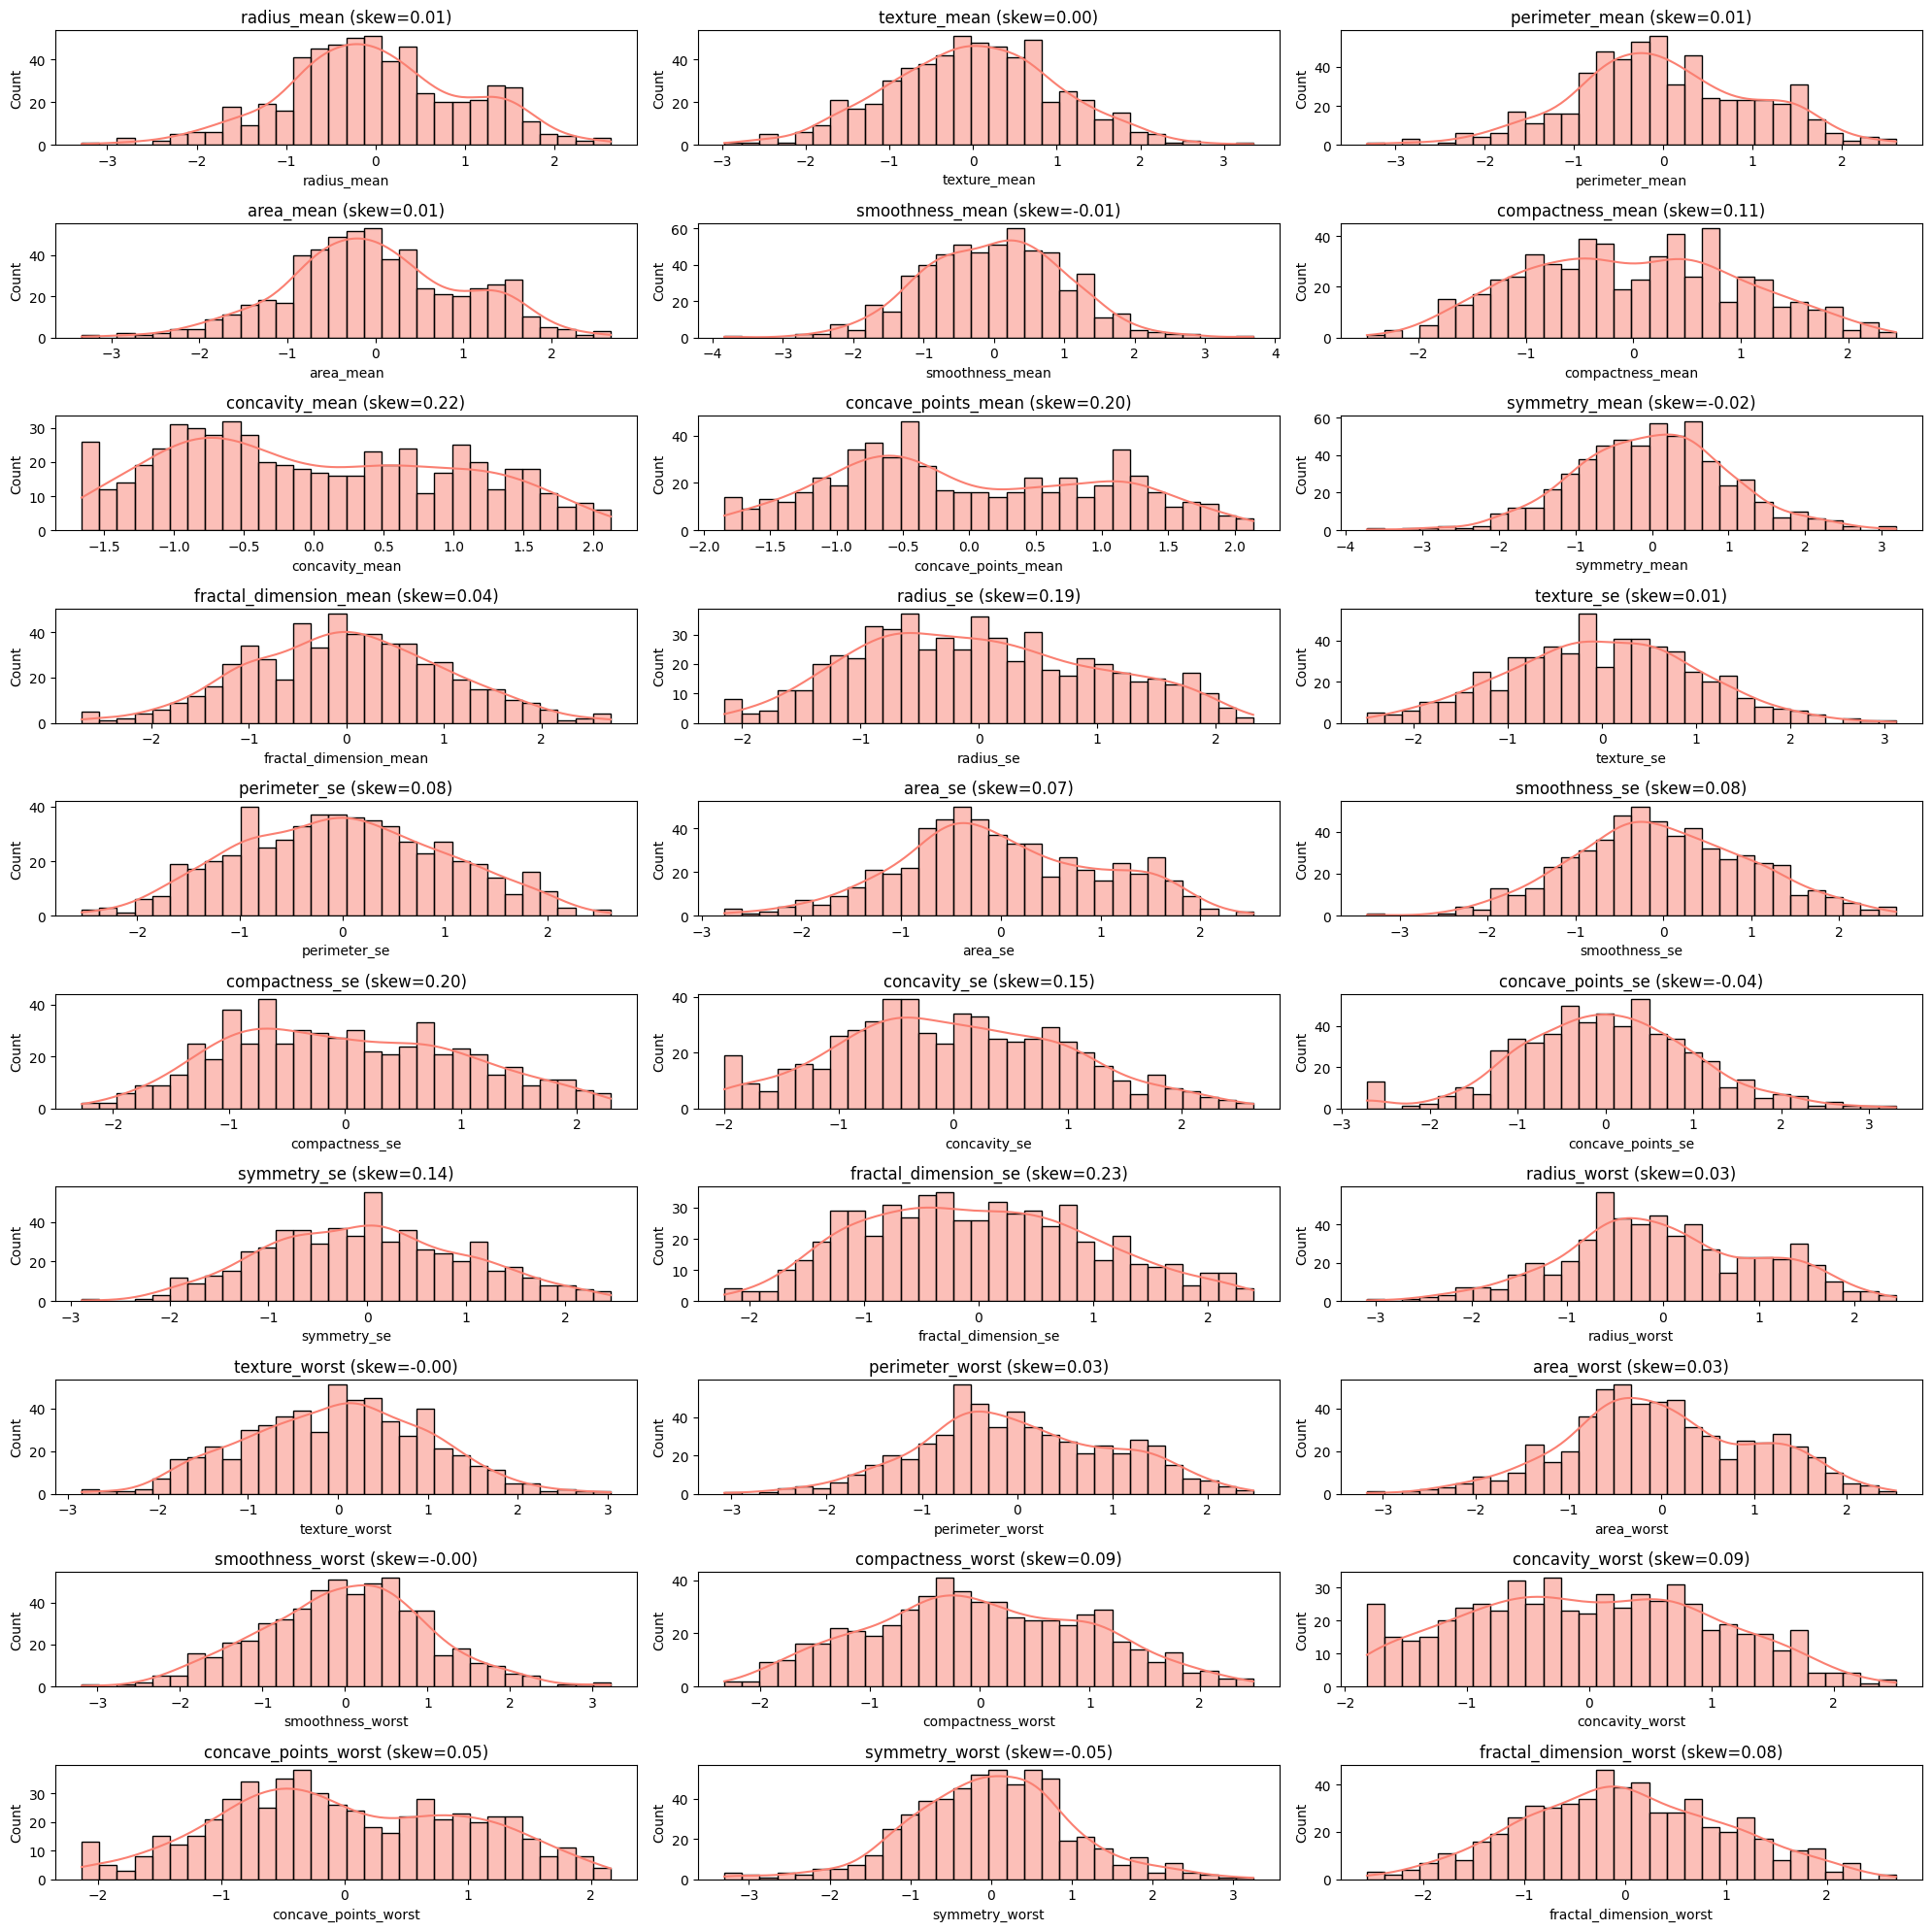

In [33]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(feature_columns):
    plt.subplot((len(feature_columns)//3), 3, i + 1)
    sns.histplot(df[col], bins=30, color='salmon', kde=True)
    skew_val = df[col].skew()
    plt.title(f'{col} (skew={skew_val:.2f})')

plt.tight_layout()
plt.show()


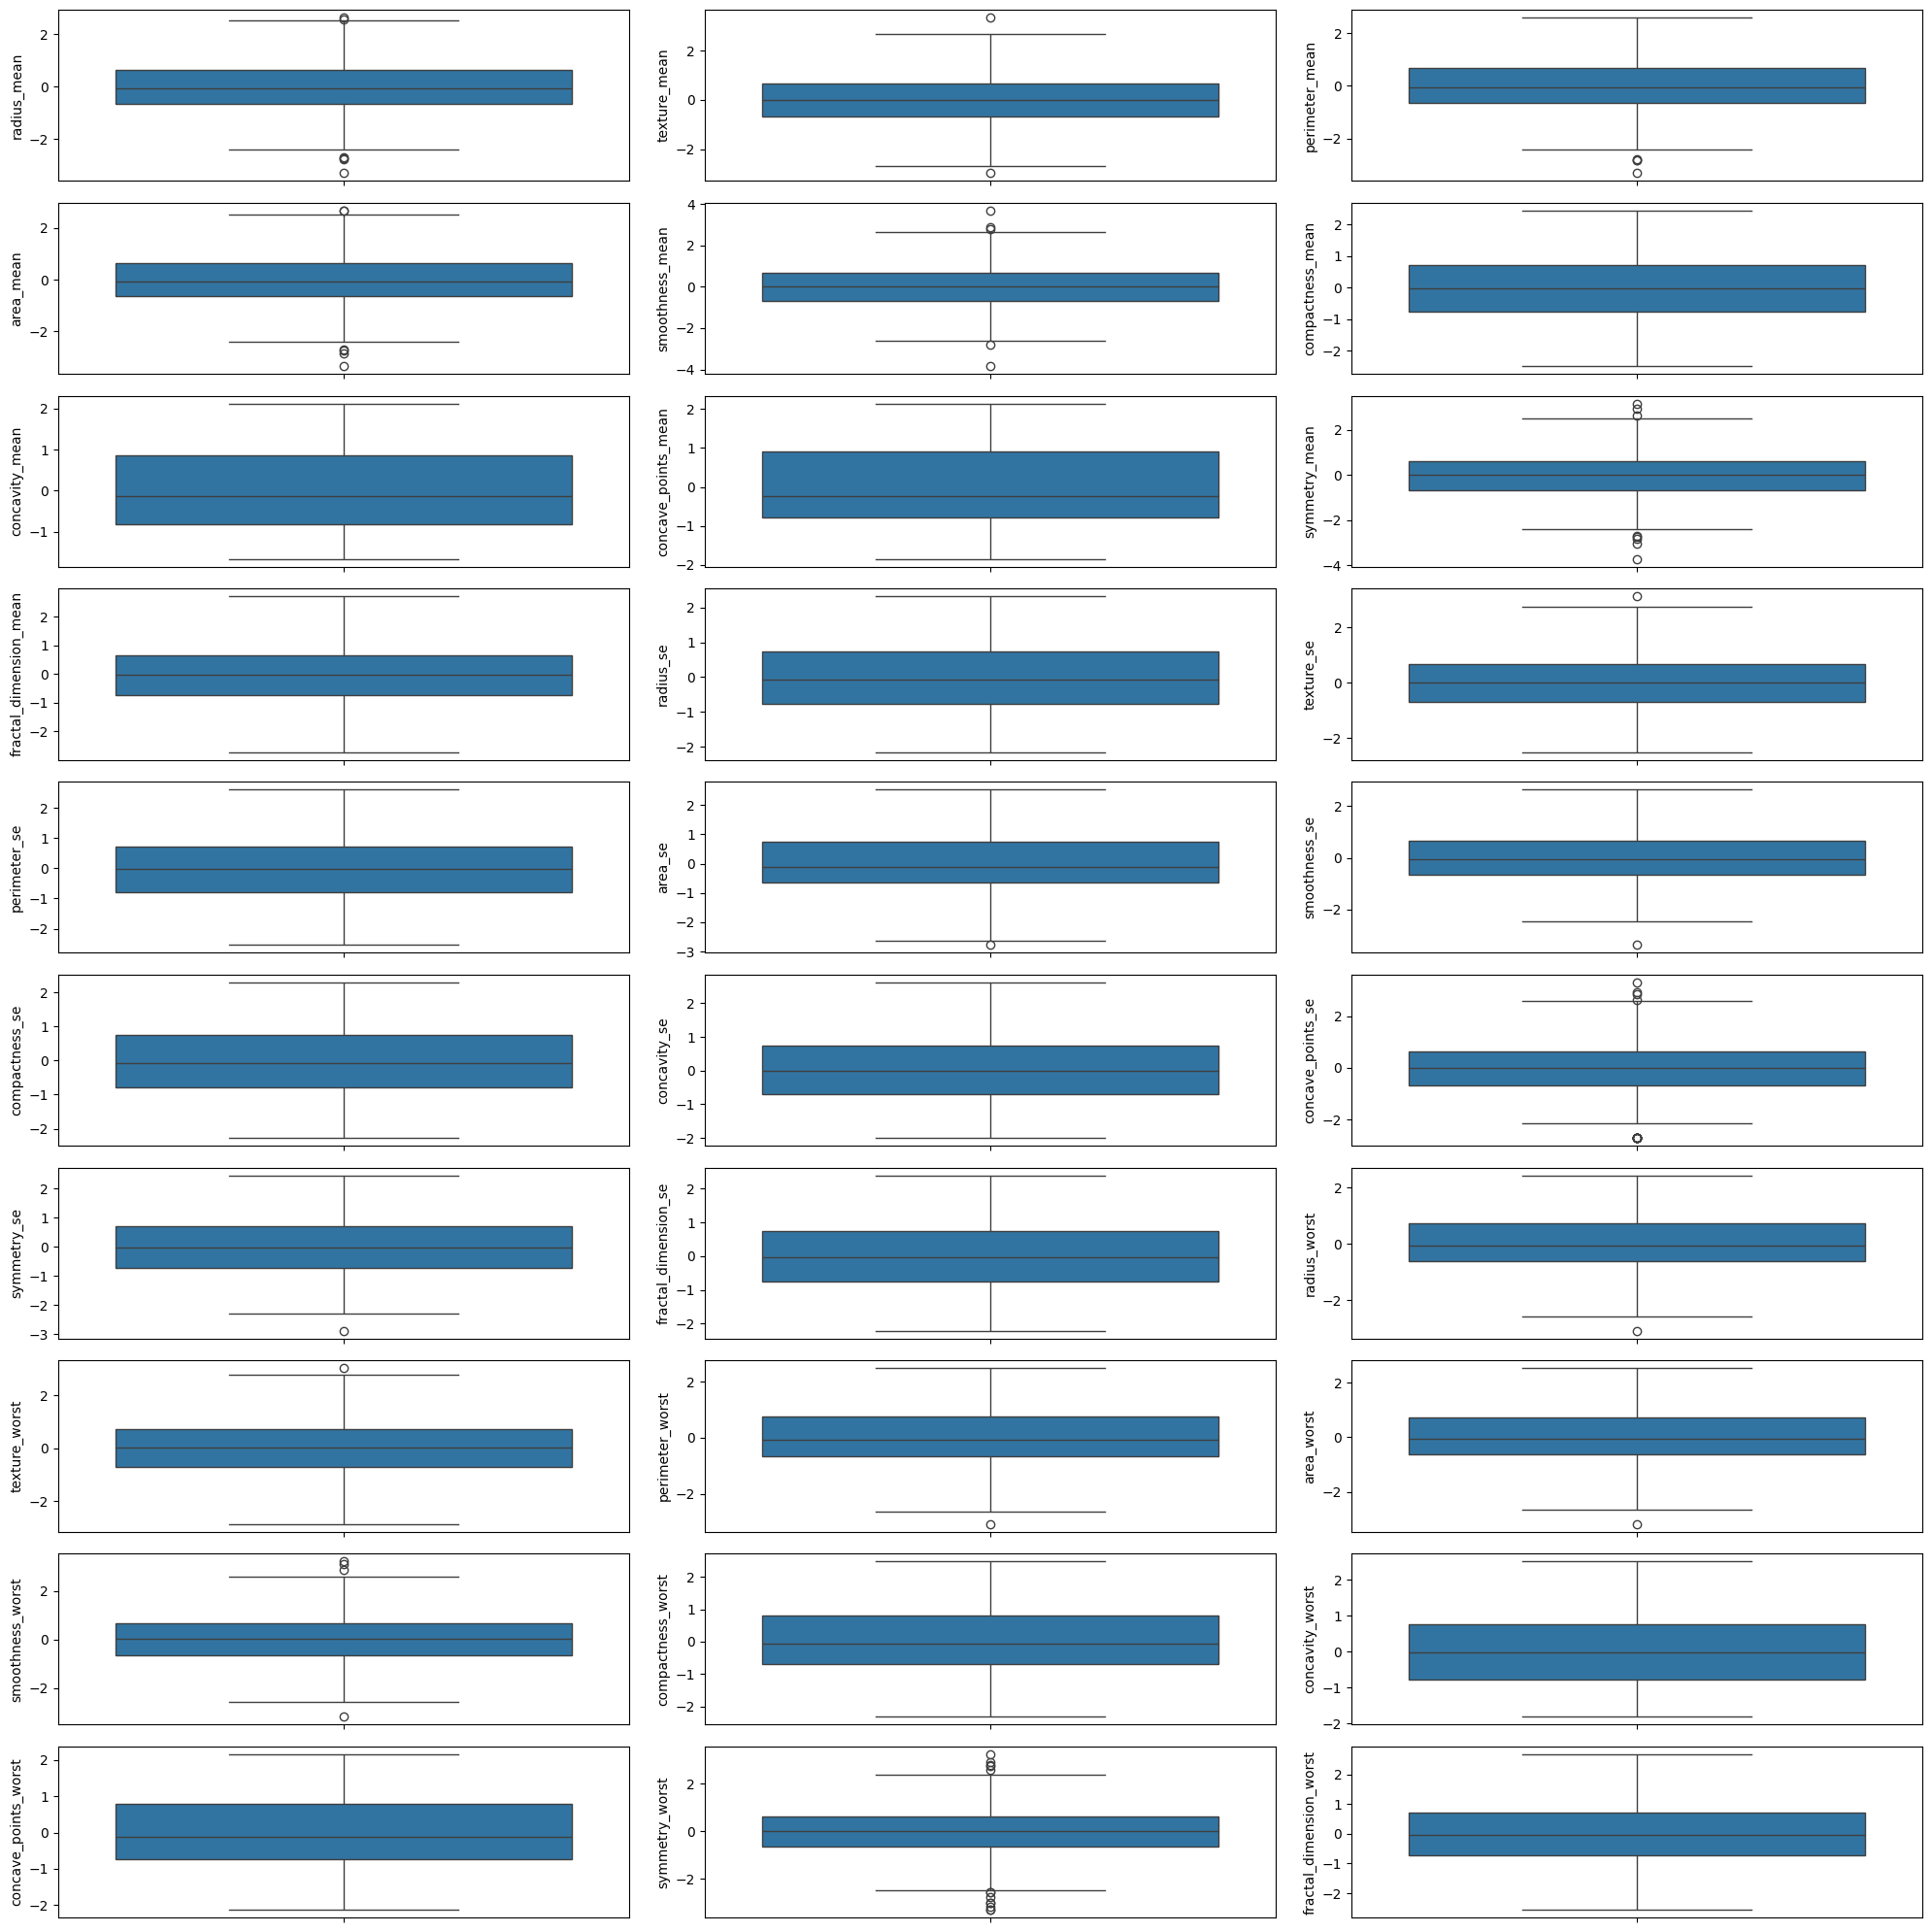

In [34]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(feature_columns):
    plt.subplot((len(feature_columns)//3), 3, i + 1)
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()

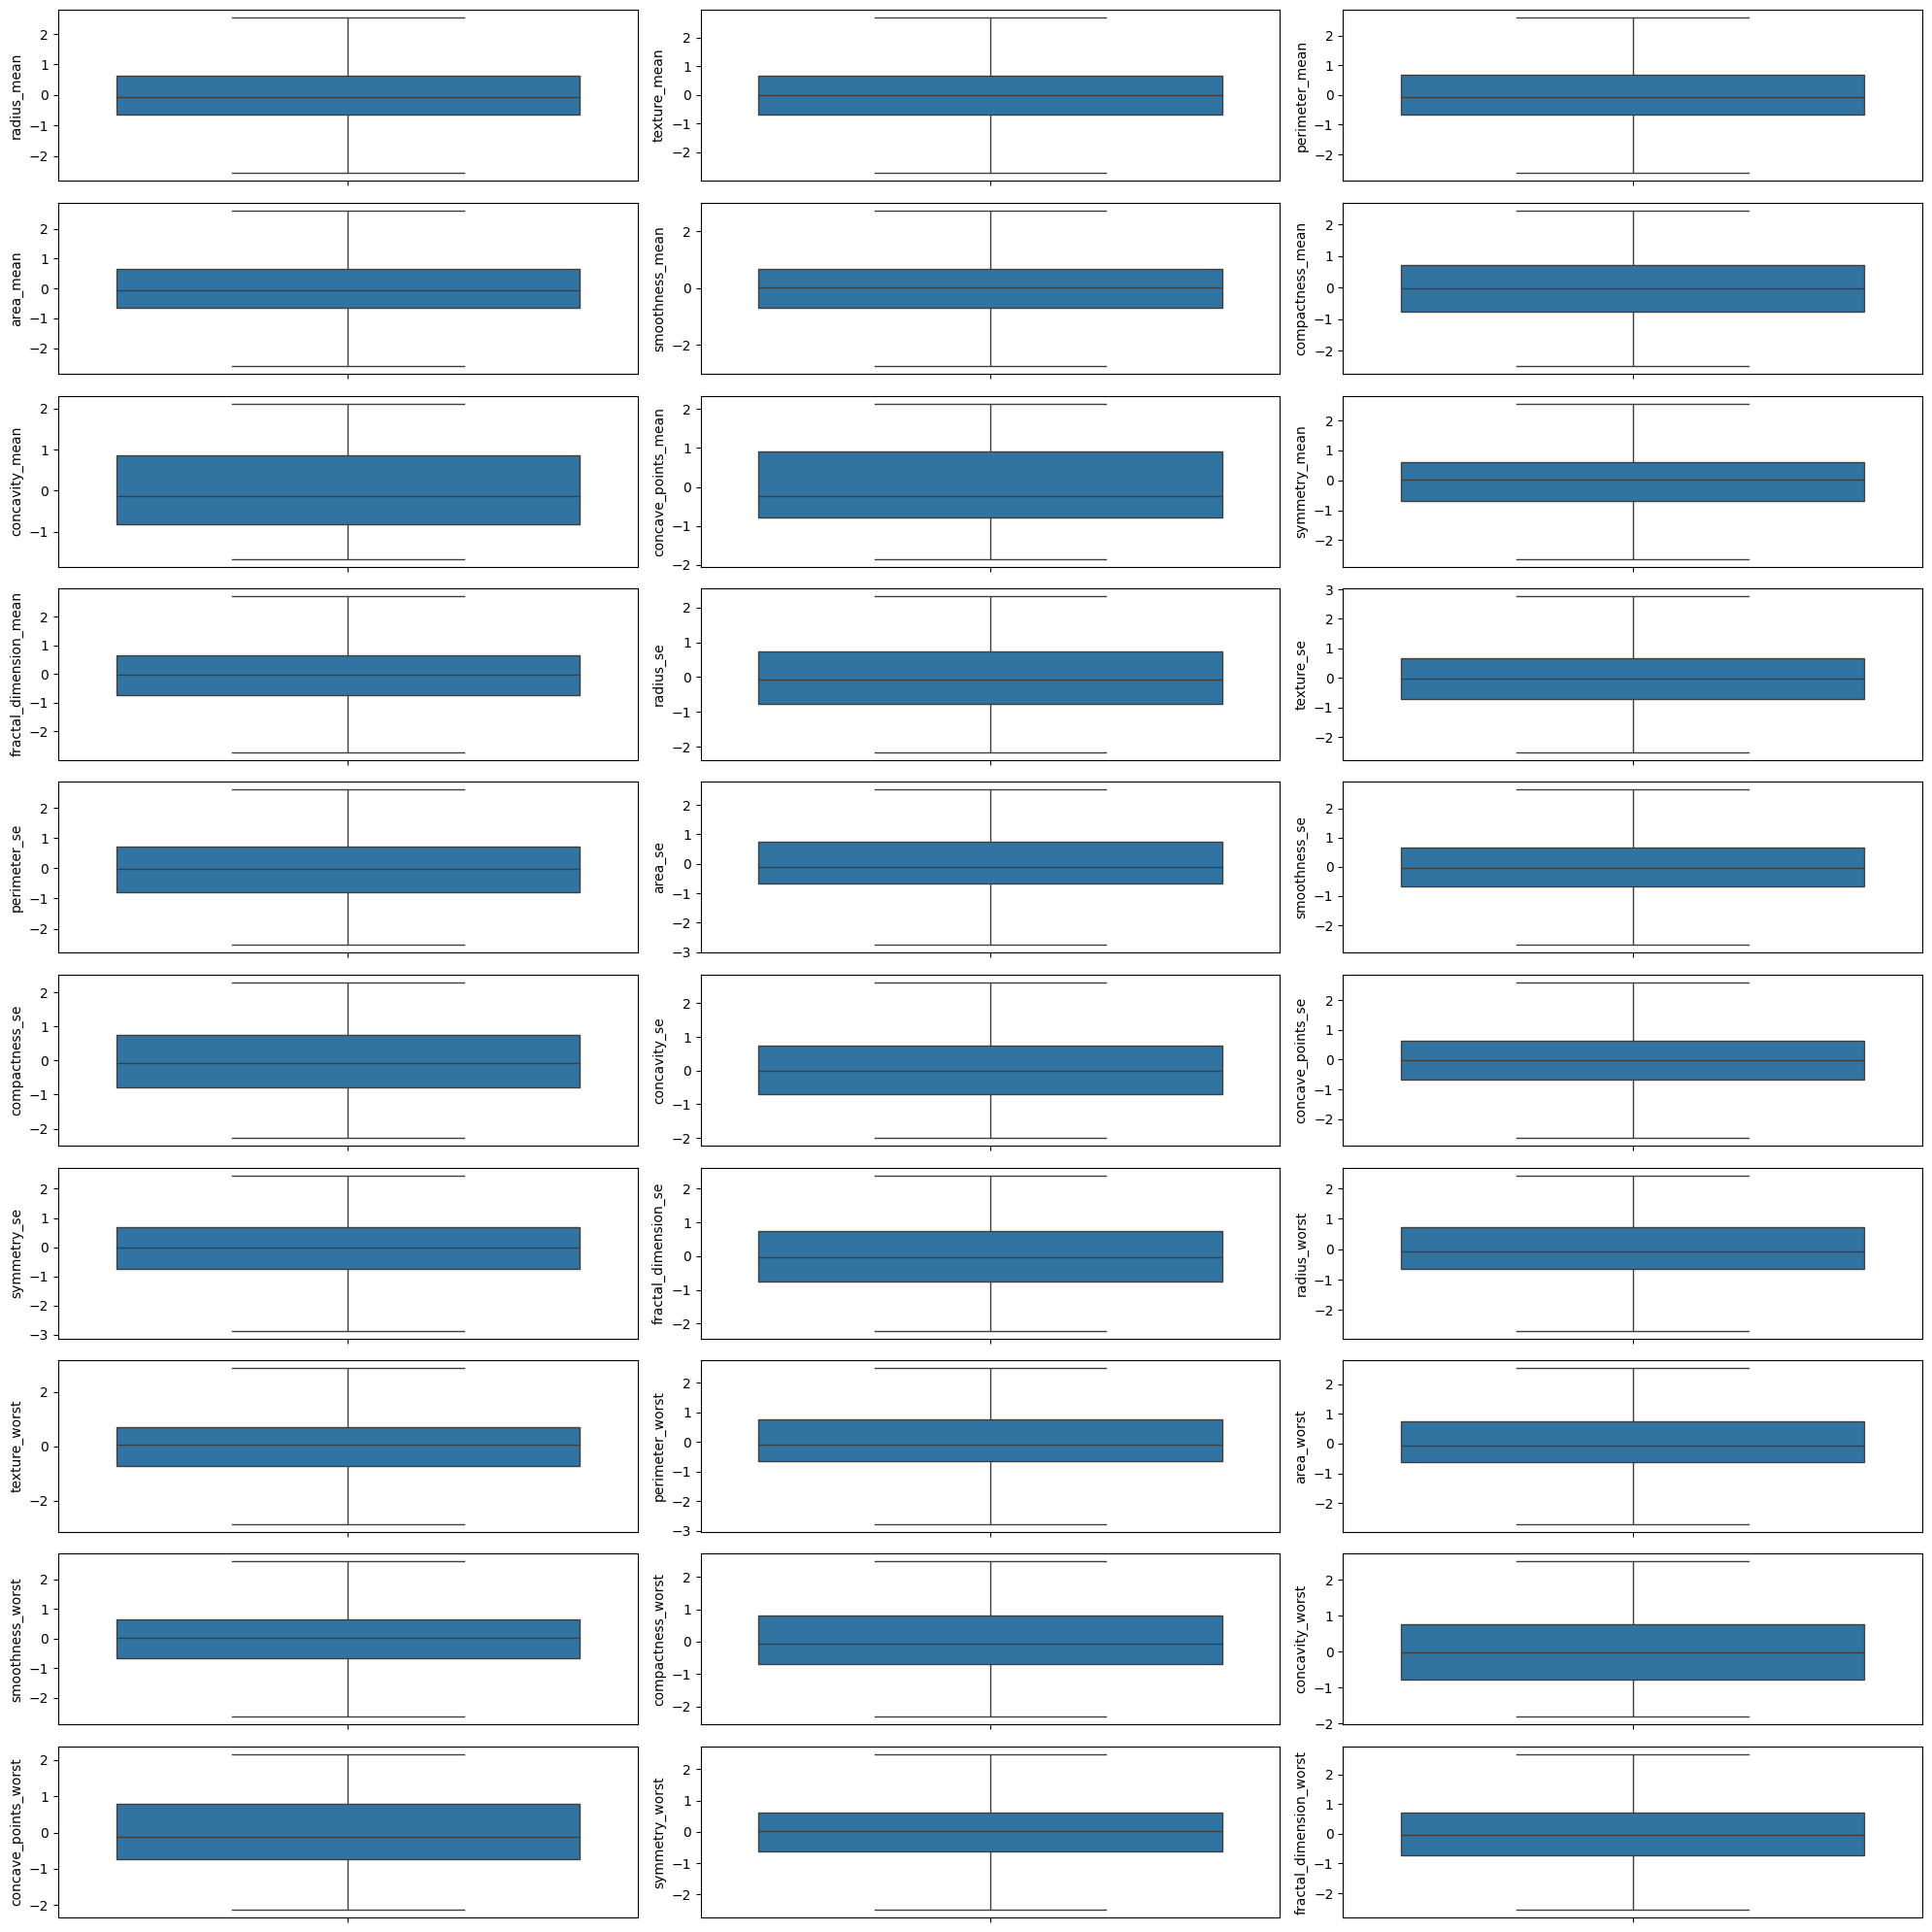

In [35]:
for col in feature_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

plt.figure(figsize=(20, 20))
for i, col in enumerate(feature_columns):
    plt.subplot((len(feature_columns)//3), 3, i + 1)
    sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()

In [36]:
X = df.drop(["ID", "Diagnosis"], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [38]:
print(X_pca)

[[ 7.43403901  1.98891248]
 [ 2.69292988 -3.56181234]
 [ 5.99790574 -0.62085719]
 ...
 [ 2.48441764 -2.11729719]
 [ 8.63657093  1.31598144]
 [-7.68078815  0.59463513]]


In [39]:
print("Explained Variance:",pca.explained_variance_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured (2 components):", pca.explained_variance_ratio_.sum())

Explained Variance: [13.91117641  5.80243053]
Explained Variance Ratio: [0.46289093 0.19307443]
Total Variance Captured (2 components): 0.6559653627615311


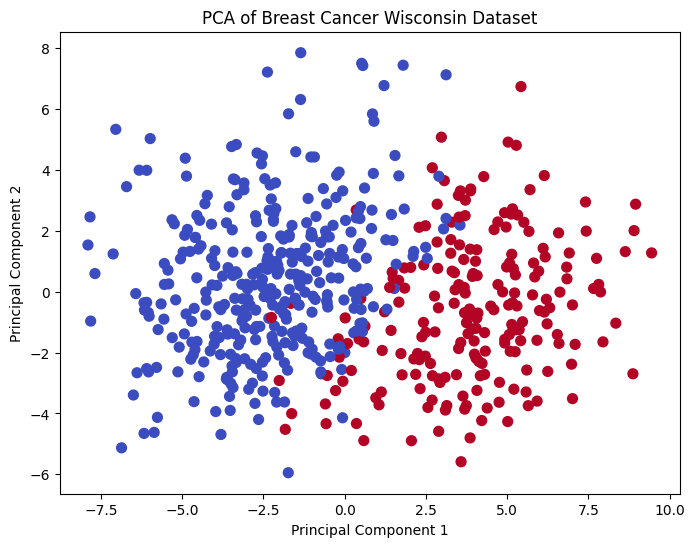

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=(df["Diagnosis"]), cmap='coolwarm', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Breast Cancer Wisconsin Dataset")
plt.show()

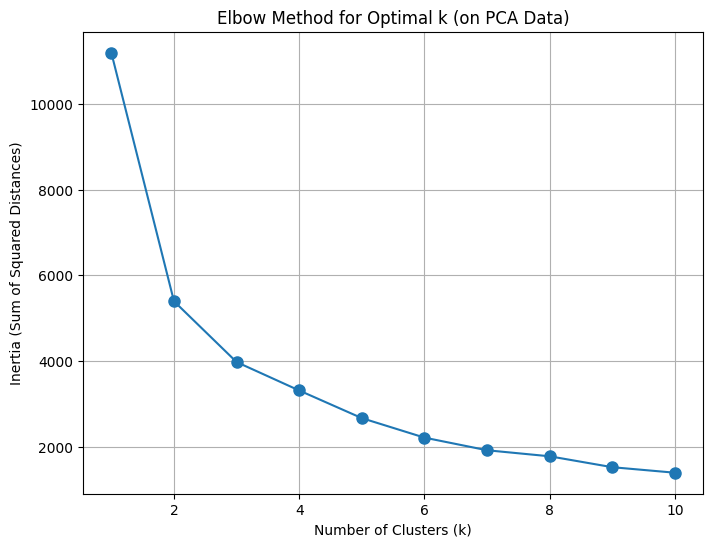

In [41]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia ,marker='o',markersize=8)
plt.title('Elbow Method for Optimal k (on PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [50]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
kmeans = KMeans(n_clusters=2, random_state=42)
labels_km = kmeans.fit_predict(X_pca)

label_counts_km = pd.Series(labels_km).value_counts()
print("Cluster label counts:")
print(label_counts_km)

sil_score = silhouette_score(X_pca,labels_km)
print(f"Silhouette Score: {sil_score:.4f}")
ari_score = adjusted_rand_score(df['Diagnosis'], labels_km)
print(f"Adjusted Rand Index: {ari_score:.4f}")

Cluster label counts:
1    353
0    216
Name: count, dtype: int64
Silhouette Score: 0.4632
Adjusted Rand Index: 0.6894


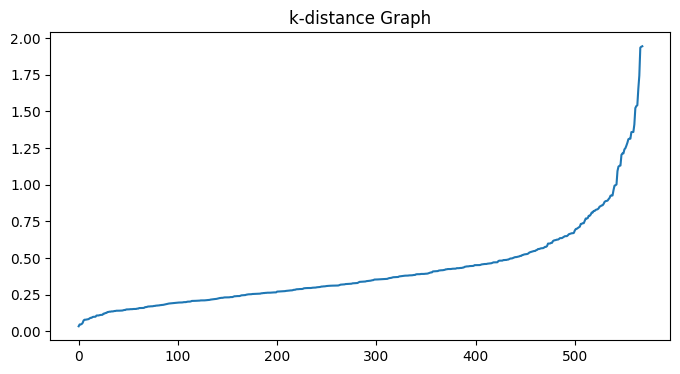

In [43]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
k_distances = np.sort(distances[:, -1])
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.title('k-distance Graph')
plt.show()

In [49]:
dbscan = DBSCAN(eps=1.7, min_samples=3) 
labels_db = dbscan.fit_predict(X_scaled)

label_counts_db = pd.Series(labels_db).value_counts()
print("Cluster label counts:")
print(label_counts_db)

mask = labels_db!= -1
if len(set(labels_db[mask])) > 1:
    print("Silhouette Score:", round(silhouette_score(X_scaled[mask], labels_db[mask]), 2))
    print("Adjusted Rand Index:", round(adjusted_rand_score(df['Diagnosis'][mask], labels_db[mask]), 2))

Cluster label counts:
-1    563
 0      3
 1      3
Name: count, dtype: int64
Silhouette Score: 0.71
Adjusted Rand Index: 1.0
